# MOVIE SCORE PREDICTION WITH PYTHON

# Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# The Data

Let's start by reading in the imdb rating data.csv file into a pandas dataframe.

In [2]:
df = pd.read_csv("netflix.csv")

In [3]:
df.head()

index        id                            title   type  \
0      0   tm84618                      Taxi Driver  MOVIE   
1      1  tm127384  Monty Python and the Holy Grail  MOVIE   
2      2   tm70993                    Life of Brian  MOVIE   
3      3  tm190788                     The Exorcist  MOVIE   
4      4   ts22164     Monty Python's Flying Circus   SHOW   

                                         description  release_year  \
0  A mentally unstable Vietnam War veteran works ...          1976   
1  King Arthur, accompanied by his squire, recrui...          1975   
2  Brian Cohen is an average young Jewish man, bu...          1979   
3  12-year-old Regan MacNeil begins to adapt an e...          1973   
4  A British sketch comedy series with the shows ...          1969   

  age_certification  runtime    imdb_id  imdb_score  imdb_votes  
0                 R      113  tt0075314         8.3    795222.0  
1                PG       91  tt0071853         8.2    530877.0  
2                 R       94  tt0079470         8.0    392419.0  
3                 R      133  tt0070047         8.1    391942.0  
4             TV-14       30  tt0063929         8.8     72895.0

In [4]:
df.dtypes

index                  int64
id                    object
title                 object
type                  object
description           object
release_year           int64
age_certification     object
runtime                int64
imdb_id               object
imdb_score           float64
imdb_votes           float64
dtype: object

In [5]:
df.shape

(5283, 11)

In [6]:
from sklearn.preprocessing import LabelEncoder 

In [7]:
id=LabelEncoder()
title=LabelEncoder()
type=LabelEncoder()
description=LabelEncoder()
age_certification=LabelEncoder()
imdb_id=LabelEncoder()
df['id']=id.fit_transform(df['id'])
df['title']=title.fit_transform(df['title'])
df['type']=type.fit_transform(df['type'])
df['description']=description.fit_transform(df['description'])
df['age_certification']=age_certification.fit_transform(df['age_certification'])
df['imdb_id']=imdb_id.fit_transform(df['imdb_id'])

In [8]:
df.tail()

index    id  title  type  description  release_year  age_certification  \
5278   5278   117   2787     0         4613          2021                 11   
5279   5279    36   1470     0          129          2021                 11   
5280   5280   126    922     0          471          2021                 11   
5281   5281   231   3669     0          293          2021                 11   
5282   5282  4029   2726     1         5211          2021                 11   

      runtime  imdb_id  imdb_score  imdb_votes  
5278      108     1877         5.8        26.0  
5279      100     1729         6.9        39.0  
5280       88     1929         6.5        32.0  
5281      116      552         6.2         9.0  
5282        0     1691         8.8        16.0

# Missing Data 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   int32  
 2   title              5283 non-null   int32  
 3   type               5283 non-null   int32  
 4   description        5283 non-null   int32  
 5   release_year       5283 non-null   int64  
 6   age_certification  5283 non-null   int32  
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   int32  
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int32(6), int64(3)
memory usage: 330.3 KB


In [10]:
df.columns

Index(['index', 'id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'imdb_id', 'imdb_score', 'imdb_votes'],
      dtype='object')

In [11]:
# check for null values

pd.isnull(df).sum()

index                 0
id                    0
title                 0
type                  0
description           0
release_year          0
age_certification     0
runtime               0
imdb_id               0
imdb_score            0
imdb_votes           16
dtype: int64

In [12]:
data = df.drop(["imdb_votes"],inplace=True,axis=1)

In [13]:
df.dtypes

index                  int64
id                     int32
title                  int32
type                   int32
description            int32
release_year           int64
age_certification      int32
runtime                int64
imdb_id                int32
imdb_score           float64
dtype: object

In [14]:
df.describe()

index           id        title         type  description  \
count  5283.000000  5283.000000  5283.000000  5283.000000  5283.000000   
mean   2641.000000  2641.000000  2619.091993     0.355101  2639.891917   
std    1525.215067  1525.215067  1513.061456     0.478589  1524.442853   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%    1320.500000  1320.500000  1306.500000     0.000000  1320.500000   
50%    2641.000000  2641.000000  2618.000000     0.000000  2640.000000   
75%    3961.500000  3961.500000  3931.500000     1.000000  3959.500000   
max    5282.000000  5282.000000  5236.000000     1.000000  5276.000000   

       release_year  age_certification      runtime      imdb_id   imdb_score  
count   5283.000000        5283.000000  5283.000000  5283.000000  5283.000000  
mean    2015.879992           7.667235    79.199886  2641.000000     6.533447  
std        7.346098           3.392393    38.915974  1525.215067     1.160932  
min     1953.000000           0.000000     0.000000     0.000000     1.500000  
25%     2015.000000           4.000000    45.000000  1320.500000     5.800000  
50%     2018.000000           8.000000    87.000000  2641.000000     6.600000  
75%     2020.000000          11.000000   106.000000  3961.500000     7.400000  
max     2022.000000          11.000000   235.000000  5282.000000     9.600000

# Data Preprocessing 

# Outliers

<Axes: >

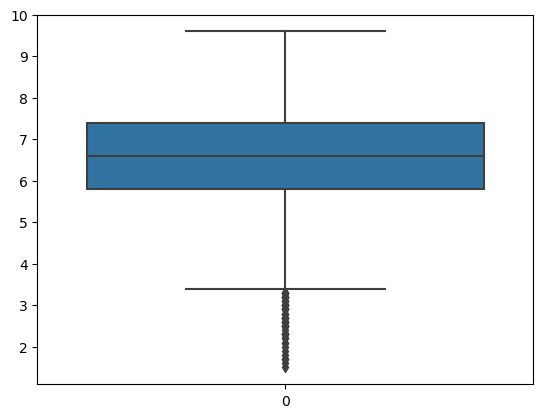

In [15]:
# Finding the outliers

sns.boxplot(df["imdb_score"])

In [16]:
# IQR

percentile25 = df['imdb_score'].quantile(0.25)
percentile75 = df['imdb_score'].quantile(0.75)

In [17]:
percentile25

5.8

In [18]:
percentile75

7.4

In [19]:
iqr = percentile75-percentile25

In [20]:
iqr

1.6000000000000005

In [21]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [22]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 9.8
Lower limit 3.399999999999999


In [23]:
# Finding outliers 
df[df['imdb_score'] > upper_limit]

Empty DataFrame
Columns: [index, id, title, type, description, release_year, age_certification, runtime, imdb_id, imdb_score]
Index: []

In [24]:
df[df['imdb_score'] < lower_limit]

index    id  title  type  description  release_year  age_certification  \
26       26  3252   1245     0         4839          1980                 11   
588     588  1584   5082     0         4200          2006                 11   
609     609   596    223     0          322          2009                 11   
720     720   762   2088     0         2922          2011                  2   
801     801  2535   1400     0         3717          2012                  2   
...     ...   ...    ...   ...          ...           ...                ...   
5197   5197   341    872     0         4062          2021                 11   
5247   5247   100   3771     0         2703          2021                 11   
5256   5256   234   1170     0         1158          2021                 11   
5261   5261   134   2916     0         2302          2021                 11   
5277   5277    23   4761     0         4940          2021                 11   

      runtime  imdb_id  imdb_score  
26        161       28         2.1  
588        95      417         2.9  
609        98     1802         2.9  
720        91      431         3.3  
801        81     2537         2.0  
...       ...      ...         ...  
5197      113     2249         3.0  
5247       93     1772         3.3  
5256       99     1319         3.2  
5261       72     1959         2.3  
5277      107     4731         2.2  

[64 rows x 10 columns]

In [25]:
# Trimming 
df = df[df['imdb_score'] < upper_limit] 

In [26]:
df =  df[df['imdb_score'] > lower_limit]

In [27]:
df.shape

(5219, 10)

In [28]:
df.duplicated().any()

False

# Exploratory Data Analysis 

# Pairplot 

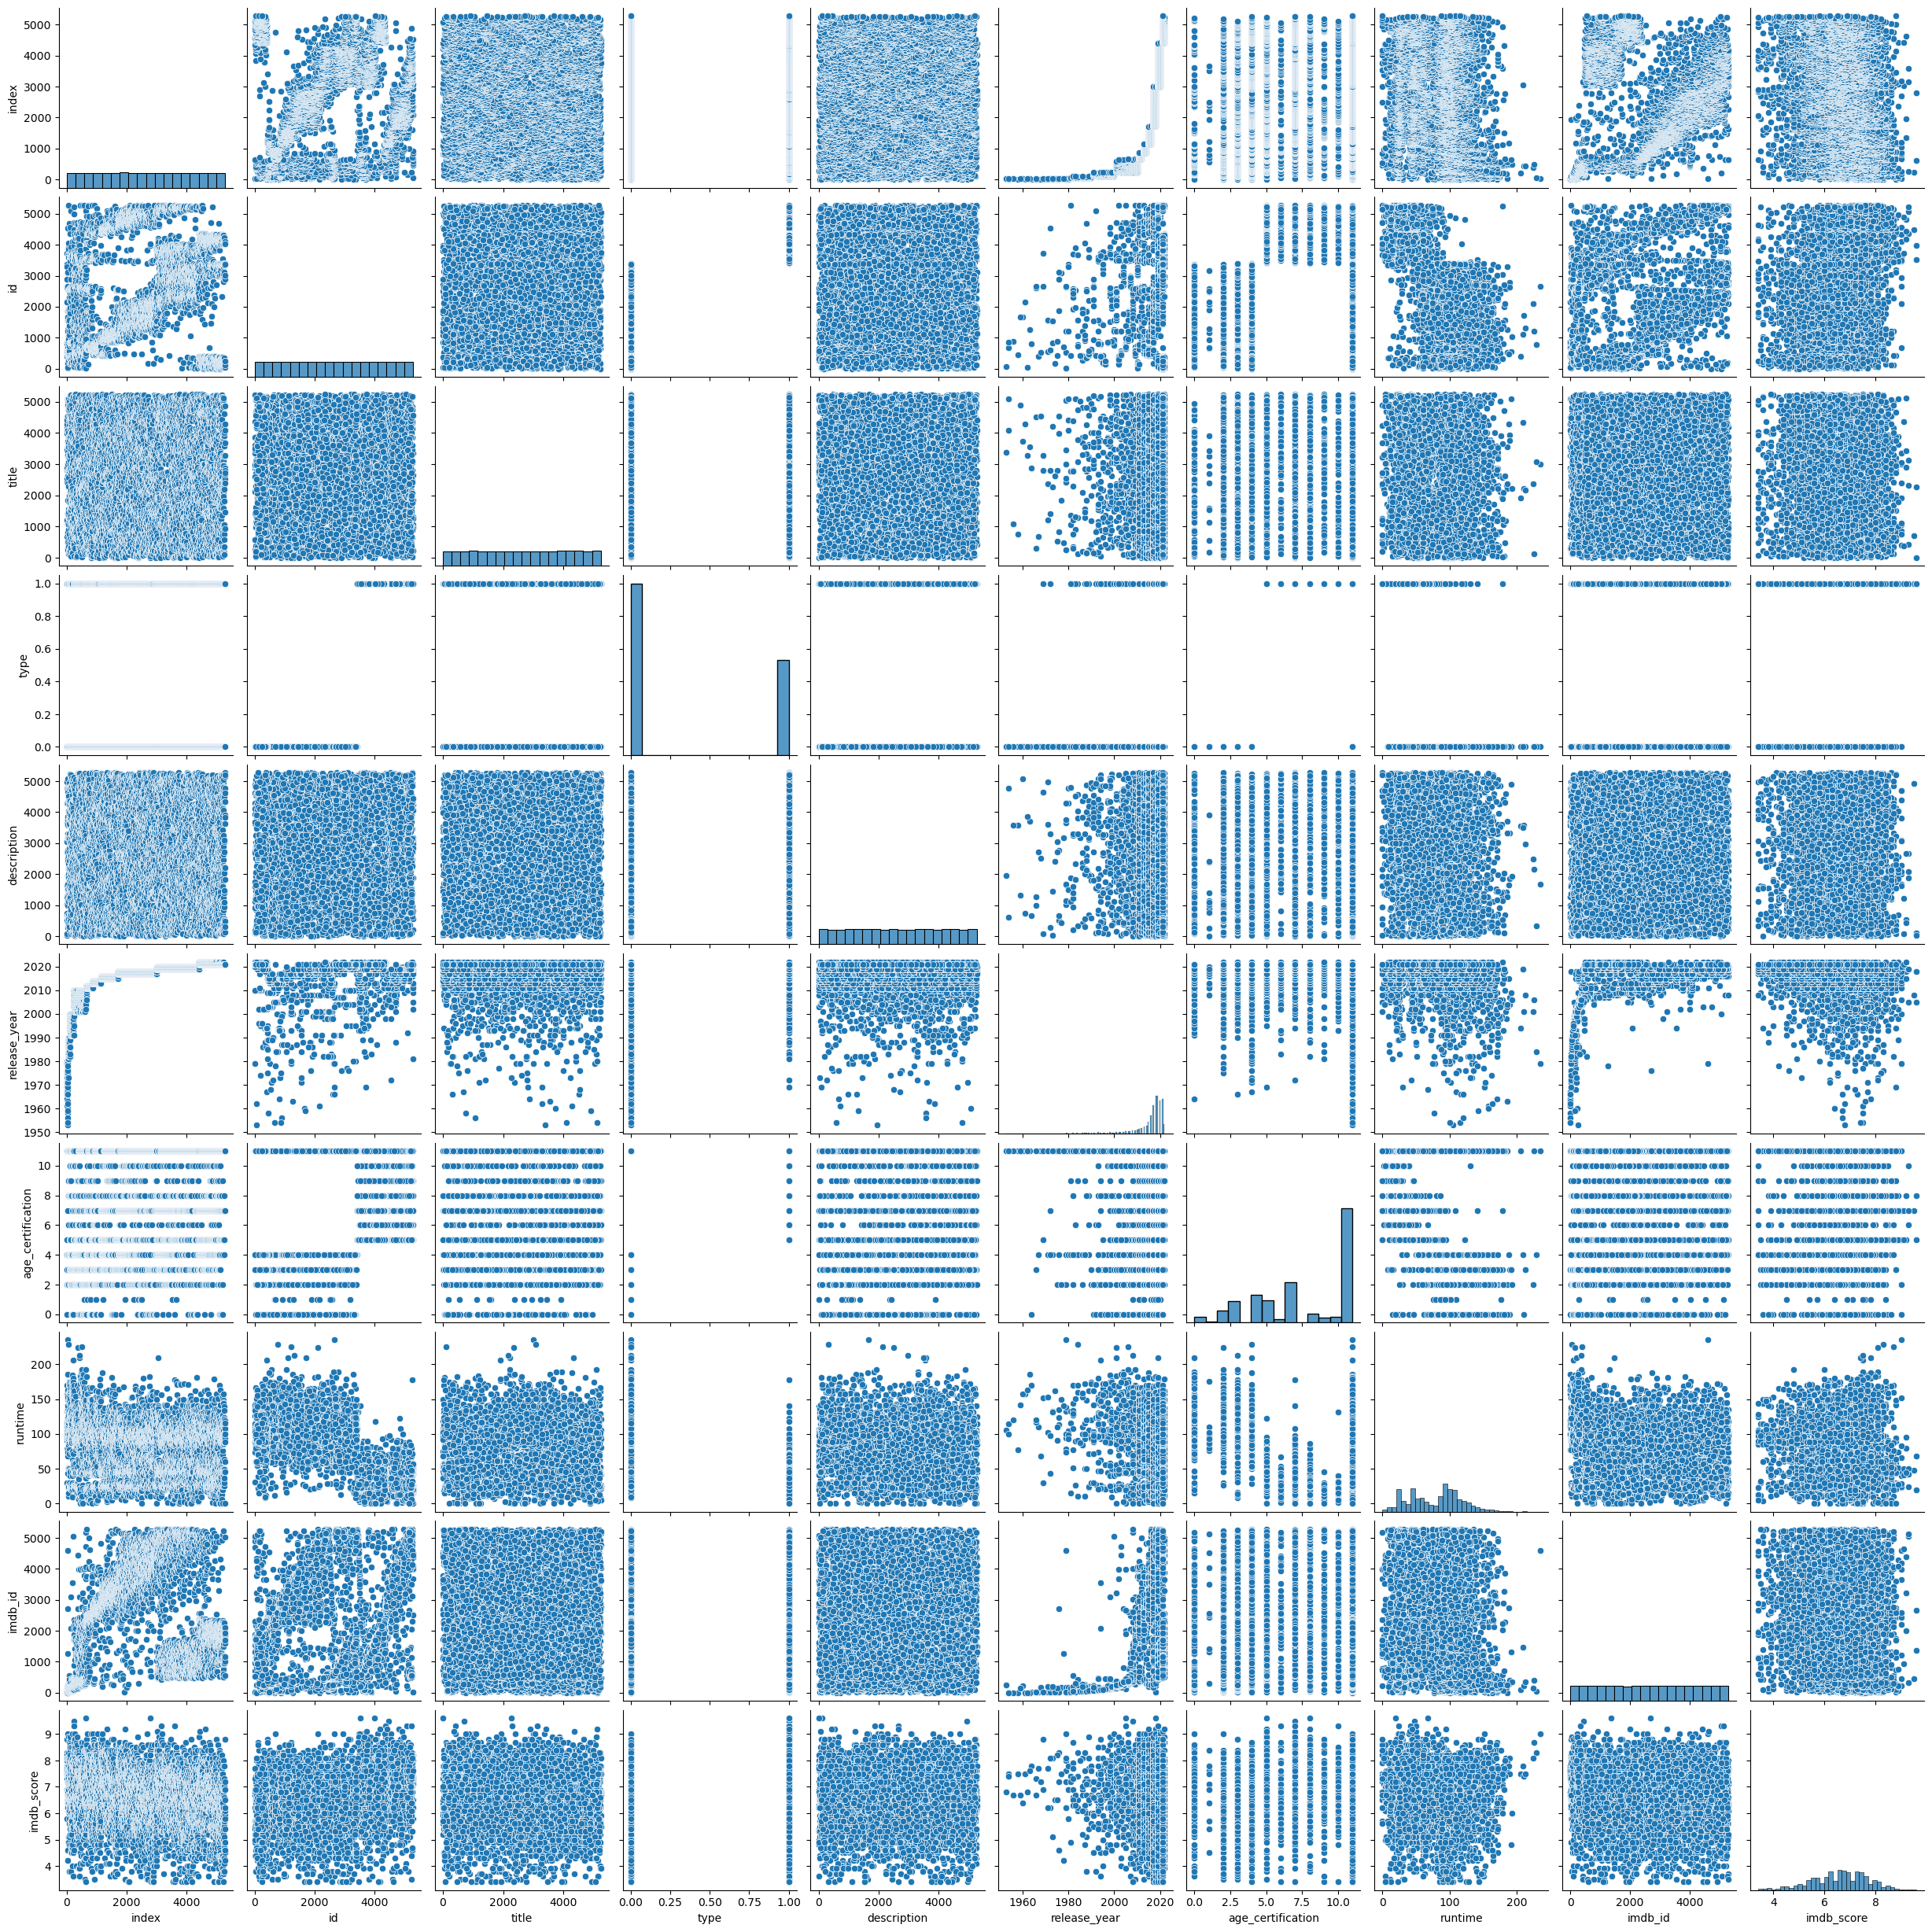

In [29]:
# plotting the pairplot
sns.pairplot(df)
plt.show()

# Linear PLot

In [30]:
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.lineplot(x="title",y="imdb_score",color="orange",data=df)
plt.grid("darkgrid")
plt.title("linear plot")
plt.show()

In [31]:
 sns.lineplot(x="type",y="imdb_score",color="Red",data=df)
plt.grid("darkgrid")
plt.title("linear plot")
plt.show()

# Movie:0 Show:1

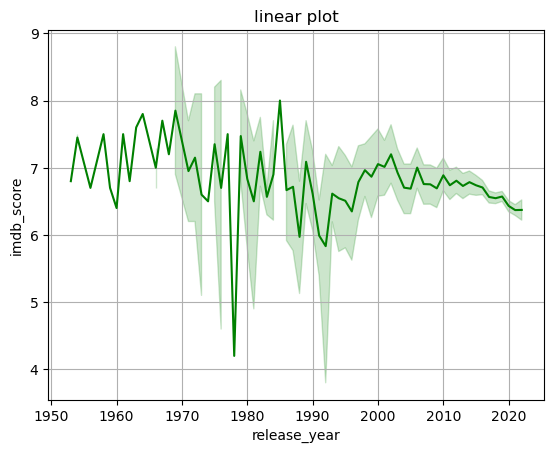

In [32]:
sns.lineplot(x="release_year",y="imdb_score",color="green",data=df)
plt.grid("darkgrid")
plt.title("linear plot")
plt.show()

# Displot

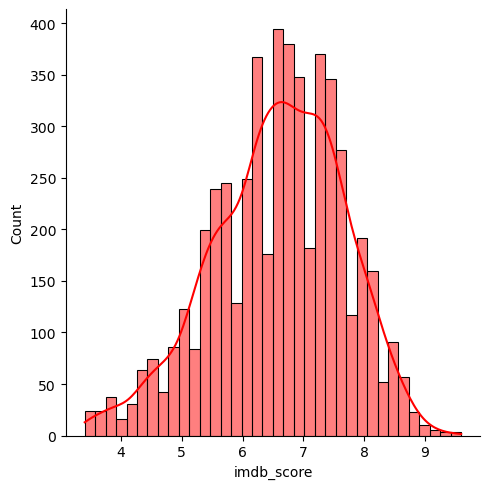

In [33]:
sns.displot(df['imdb_score'],kde=True,color="red")

In [34]:
sns.displot(df['release_year'],kde=True,color="yellow")

In [35]:
sns.displot(df['runtime'],kde=True,color="blue")

# Importing Pipeline

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [37]:
df.columns

Index(['index', 'id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'imdb_id', 'imdb_score'],
      dtype='object')

In [38]:
x = df.drop(['imdb_score'], axis='columns')
y = df.imdb_score

In [39]:
x.head()

index    id  title  type  description  release_year  age_certification  \
0      0  2895   3982     0          496          1976                  4   
1      1   421   2804     0         3045          1975                  2   
2      2  2644   2431     0         1654          1979                  4   
3      3   835   4212     0           34          1973                  4   
4      4  3718   2806     1           82          1969                  5   

   runtime  imdb_id  
0      113       21  
1       91       18  
2       94       23  
3      133       16  
4       30       11

In [41]:
y.head()

0    8.3
1    8.2
2    8.0
3    8.1
4    8.8
Name: imdb_score, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [43]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4175, 9), (1044, 9), (4175,), (1044,))

In [71]:
steps=[("scaling",StandardScaler()),
       ("reg",LinearRegression())]

In [72]:
pipe=Pipeline(steps)

In [73]:
##visualize Pipeline
from sklearn import set_config
set_config(display="diagram")
pipe

Pipeline(steps=[('scaling', StandardScaler()), ('reg', LinearRegression())])

In [74]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaling', StandardScaler()), ('reg', LinearRegression())])

In [75]:
x_test

index    id  title  type  description  release_year  age_certification  \
128     128  2536    364     0          679          1999                  4   
3894   3894  3213   5135     0         4733          2020                  2   
5064   5064  2983   3939     0         2090          2021                 11   
297     297  2793   5140     0         4583          2004                  3   
3169   3169  2284   3943     0         2953          2019                  3   
...     ...   ...    ...   ...          ...           ...                ...   
2561   2561  1373   2093     0          356          2017                  2   
5205   5205    82   1772     0         3624          2021                 11   
4415   4415  3665   1786     1         4031          2022                  5   
4644   4644  2987   4262     0         1371          2021                 11   
641     641  3127   1979     0         1416          2010                 11   

      runtime  imdb_id  
128       162      143  
3894       93      811  
5064      101     1924  
297        95      285  
3169       82     3821  
...       ...      ...  
2561      180     2890  
5205      113     1564  
4415       28      749  
4644       98     3940  
641       106     2156  

[1044 rows x 9 columns]

In [76]:
y_test

128     6.9
3894    5.4
5064    6.7
297     5.8
3169    5.8
       ... 
2561    6.4
5205    6.2
4415    8.9
4644    5.8
641     7.0
Name: imdb_score, Length: 1044, dtype: float64

In [77]:
pipe.predict(x_test)

array([7.07110629, 6.16144158, 6.07848699, ..., 6.74374767, 6.08101225,
       6.74730201])

In [78]:
pipe.predict([[5197,341,872,0,4062,2021,11,113,2249]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([5.95908228])

In [79]:
pipe.score(x_test,y_test)

0.15301622858350306

# Apply Lassio Regression

In [80]:
# Lasso Regression

from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=25, max_iter=100, tol=0.1)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=25, max_iter=100, tol=0.1)

In [81]:
lasso_reg.score(x_test,y_test)

0.11258904840272166

In [82]:
lasso_reg.score(x_train, y_train)

0.11737011090341243

# Apply Ridge Regression 

In [83]:
# Ridge Regression 

from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [84]:
ridge_reg.score(x_test,y_test)

0.14996861853052268

In [85]:
ridge_reg.score(x_train,y_train)

0.14873565380570886

In [86]:
pipe.predict([[5277,23,4761,0,4940,2021,11,107,4731]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([5.80595216])

# R2 score 

In [88]:
from sklearn.metrics import r2_score
x_train_prediction = pipe.predict(x_train)
r2 = r2_score(x_train_prediction , y_train)

In [89]:
print(f"R^2: {r2}")

R^2: -4.666007616113963


# Apply Joblib

In [92]:
# using joblib for saving the model

import joblib
joblib.dump(pipe,"pipe_joblib")

['pipe_joblib']

In [93]:
pipe = joblib.load('pipe_joblib')

In [96]:
pipe.predict([[5282,4029,2726,1,5211,2021,11,0,1691]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([6.49712935])

# Conclusion

In this project, I successfully developed a machine learning model to predict movie scores based on various features such as title,type,description and release date. The objective was to use these factors to estimate the scores a movie would receive, helping stakeholders make informed decisions regarding marketing, distribution, and investment.